In [2]:
from simple_exact_diagonalization_routines.local_matrix_class import *
from scipy.linalg import expm
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from class_ising_model import *
import itertools
from class_double_bracket_flow import *

In [4]:
# Inputs: B(Z), D(X), max_range
# J for |i-j|>range = 0
sys = ising_model([0,0,0],[0,0,0],max_coupling_range = 2)

## I. Observation of Hamiltonian
Taking L = 3 for an example

In [5]:
print(sys.H)

[[ 2.5  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -1.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -1.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.5  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   2.5]]


## II. DBF

In [8]:
sys = ising_model([1,1,1],[1,1,1],max_coupling_range = 2)
H_LRIM = sys.H

flow = double_bracket_flow( H_LRIM )
# print(H_LRIM)

### Canonical bracket

Flow step  0  using H with norm  11.74734012447073
    Found minimum norm =  7.343428051255362  for s =  0.04040404040404041
Flow step  1  using H with norm  11.74734012447073
    Found minimum norm =  5.9928225502991355  for s =  0.010101010101010102
Flow step  2  using H with norm  11.74734012447073
    Found minimum norm =  5.300649000738311  for s =  0.020202020202020204
Flow step  3  using H with norm  11.747340124470728
    Found minimum norm =  4.80898075459531  for s =  0.010101010101010102
Flow step  4  using H with norm  11.74734012447073
    Found minimum norm =  4.5058114371789335  for s =  0.010101010101010102


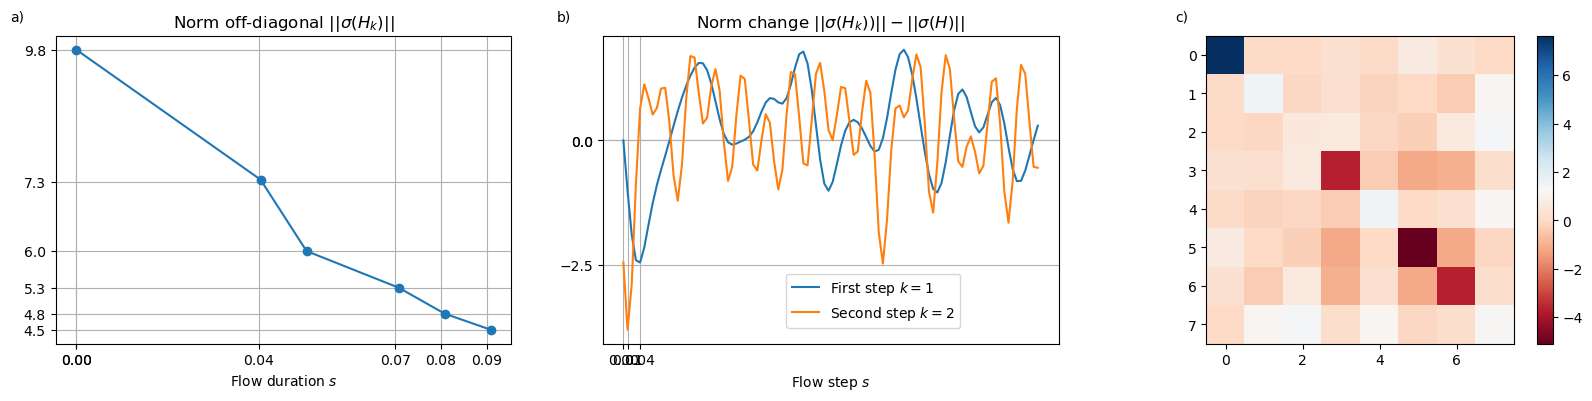

In [9]:
flow.please_be_exhaustively_verbose = False
flow.please_be_verbose = True

flow.nmb_search_points_minimizing_s_search = 100
flow.flow_step_max = 1
flow.nmb_flow_steps = 5
flow.please_use_binary_search =  False
flow.please_compute_observables = False
flow.flow_forwards( )


flow.show_flow_forwards_results()

### Onsite Z

Flow step  0 using H with norm 19.390719429665317
    Found minimum norm =  9.711136743184953  for s =  0.2
Flow step  1 using H with norm 19.390719429665317
For step 1 , the minimum norm found 9.093914719570028 with magnetic field B =  [0.6871925  0.4211151  0.41378257 0.42333501] step size s =  0.2
Flow step  2 using H with norm 19.390719429665314
For step 2 , the minimum norm found 6.814479011078761 with magnetic field B =  [0.6871925  0.4211151  0.41378257 0.42333501] step size s =  0.11111111111111112
Flow step  3 using H with norm 19.390719429665314
For step 3 , the minimum norm found 5.687497915857651 with magnetic field B =  [0.6871925  0.4211151  0.41378257 0.42333501] step size s =  0.06666666666666667
Flow step  4 using H with norm 19.390719429665317
For step 4 , the minimum norm found 5.246548320484869 with magnetic field B =  [0.75592895 0.37796447 0.37796447 0.37796447] step size s =  0.022222222222222223
Flow step  5 using H with norm 19.390719429665317
For step 5 , the 

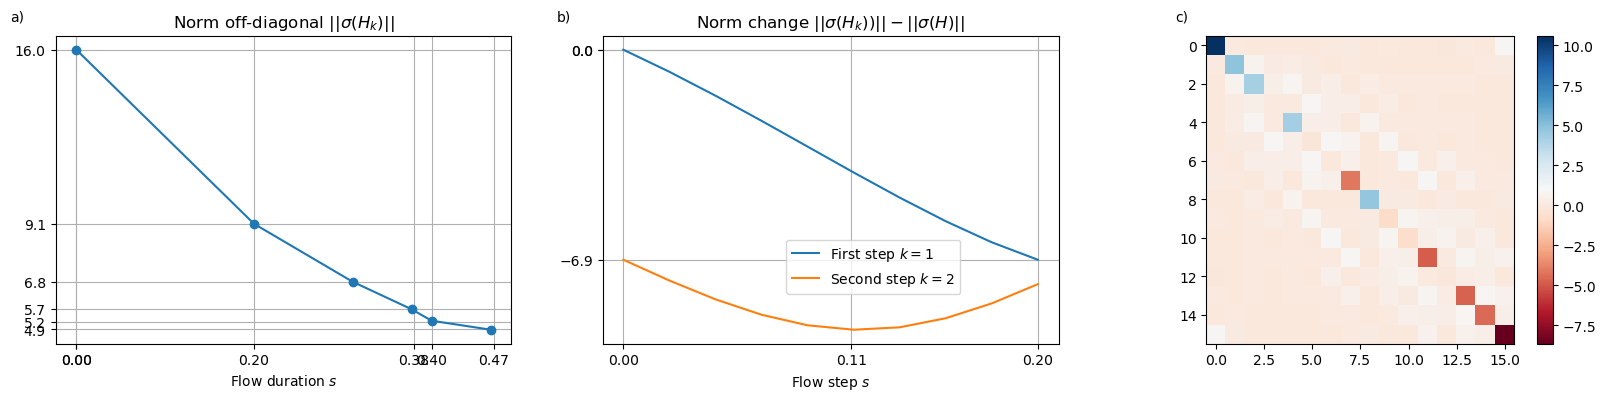

In [15]:
flow.please_be_exhaustively_verbose = False
flow.please_be_verbose = True

flow.flow_step_max = 0.2
flow.nmb_search_points_minimizing_s_search = 10
flow.please_use_binary_search =  False
flow.please_compute_observables = False


flow.flow_generator['type'] = 'magnetic_field'
flow.flow_generator['onsite_Z_coupling'] = np.asarray([2,1,1,1])

flow.magnetic_step_min = 0
flow.magnetic_step_max = 0.1
flow.nmb_search_points_magnetic_b_search = 10
flow.nmb_flow_steps = 5

flow.flow_via_onsite_Z_potential_search()
flow.show_flow_forwards_results()